In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [11]:
def read_data(Xpath="data/q3/logisticX.csv",Ypath="data/q3/logisticY.csv"):
    X = np.array(pd.read_csv(Xpath,header=None).values)
    Y = np.array(pd.read_csv(Ypath,header=None).values)
    X = normalize(X)
    return X,Y

def normalize(X):
    mean=np.mean(X,axis=0)
    X=(X-mean)/np.std(X,axis=0)
    return X

def augment_intecept(X):
    m=len(X)
    return np.c_[np.ones(m),X]

def get_cost(X,Y,theta):
    m=len(X)
    H = np.dot(X,theta)
    loss=np.dot((H-Y).T,(H-Y))
    cost=loss/(2*m)
    return cost[0,0]


In [12]:
def h_theta(X,theta):
    Z = np.dot(X,theta)
    H = 1/(1+np.exp(-Z))
    return H
def grad_l_theta(X,Y,theta):
    H = h_theta(X,theta)
    grad=np.dot(X.T,(Y-H))
    return grad

# logistic regression
def logistic_regression(X,Y,alpha=0.1,threshold=0.00000001,max_iter=10000):
    theta=np.zeros((X.shape[1],1))
    converged=False
    costvector=[-1]
    iter=0
    while not converged:
        theta = theta + alpha*grad_l_theta(X,Y,theta)
        costvector.append(get_cost(X,Y,theta))
        if abs(costvector[-1]-costvector[-2])<threshold or iter>max_iter:
            converged=True
    return theta,costvector[1:]

# hessian calculation

def hessian(x,Y):
    h=h_theta(x,theta)
    l_d=np.dot(x.T,(h-Y))
    l_d_d=np.linalg.pinv(-np.dot(x.T,np.multiply(x,np.multiply(h,(1-h)))))
    return l_d,l_d_d

# netwons method
def netwons_method(X,Y,maxiter=10000,threshold=0.001):
    theta=np.zeros((X.shape[1],1))
    l_d,l_d_d=hessian(X,Y)
    converged=False
    costvector=[-1]
    iter=0
    while not converged:
        iter+=1
        theta = theta - np.dot(l_d_d,l_d)
        cost=get_cost(X,Y,theta)
        costvector.append(cost)
        if(cost<threshold or abs(costvector[-1]-costvector[-2])<threshold or iter>maxiter):
            converged=True
    return theta,costvector[1:]

def get_accuracy(X,Y,theta):
    Y_pred=h_theta(X,theta)
    Y_pred=np.where(Y_pred>0.5,1,0)
    return np.mean(Y_pred==Y)


theta: [[ 0.40125316]
 [ 2.5885477 ]
 [-2.7255885 ]]
accuracy: 0.88
-0.1472170739885948 -0.9497206596108467


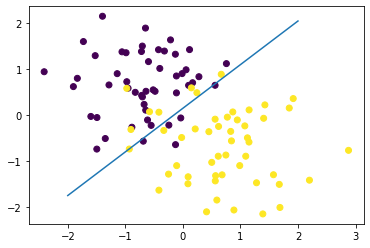

In [13]:
X,Y=read_data()
X=augment_intecept(X)
theta,costvector=logistic_regression(X,Y)
print("theta:",theta)
# plot line corresponding to theta
x=np.linspace(-2,2,2)
y=-(theta[0,0]+theta[1,0]*x)/theta[2,0]
plt.plot(x,y)
plt.scatter(X[:,1],X[:,2],c=Y)
print("accuracy:",get_accuracy(X,Y,theta))
print(theta[0,0]/theta[2,0],theta[1,0]/theta[2,0])

[[ 2.66983526e-09]
 [ 6.89942775e-09]
 [-7.73346829e-09]]
accuracy: 0.89
-0.34523129378245515 -0.8921518121011703


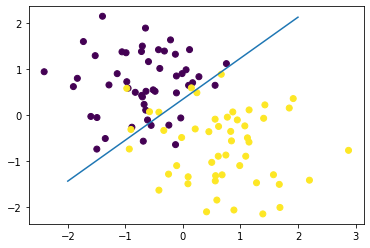

In [14]:
theta,costvector=netwons_method(X,Y,0,0.00001)
x=np.linspace(-2,2,2)
y=-(theta[0,0]+theta[1,0]*x)/theta[2,0]
plt.plot(x,y)
plt.scatter(X[:,1],X[:,2],c=Y)
print(theta)
print("accuracy:",get_accuracy(X,Y,theta))
print(theta[0,0]/theta[2,0],theta[1,0]/theta[2,0])

[0.2499999936912543]


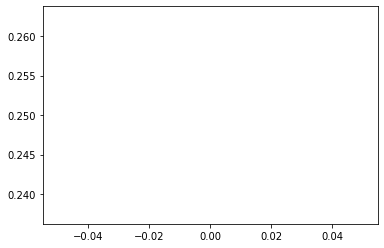

In [15]:
print(costvector)
plt.plot(costvector)